Algerian_forest_fires_dataset_UPDATE

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv(r'C:\Users\soodk\OneDrive\Desktop\python\18. RidgeLassoForestData\Bejaia Region ForestFire Dataset.csv')

In [3]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire


In [4]:
df.head(3)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          122 non-null    int64  
 1   month        122 non-null    int64  
 2   year         122 non-null    int64  
 3   Temperature  122 non-null    int64  
 4    RH          122 non-null    int64  
 5    Ws          122 non-null    int64  
 6   Rain         122 non-null    float64
 7   FFMC         122 non-null    float64
 8   DMC          122 non-null    float64
 9   DC           122 non-null    float64
 10  ISI          122 non-null    float64
 11  BUI          122 non-null    float64
 12  FWI          122 non-null    float64
 13  Classes      122 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 13.5+ KB


I am going to predict temperature, so temperature is my dependent feature and rest of all features are independent.


Data Cleaning

In [5]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [6]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [7]:
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [8]:
df['Classes'].value_counts()

Classes
not fire       60
fire           53
fire            4
fire            2
not fire        2
not fire        1
Name: count, dtype: int64

In [9]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)
# If it contains 'not fire' then make it to 0 otherwise 1

In [10]:
df['Classes'].value_counts()
# not fire : 0
# fire : 1

Classes
0    63
1    59
Name: count, dtype: int64

In [11]:
# Percentage for pie chart
percentage = df['Classes'].value_counts(normalize=True)*100

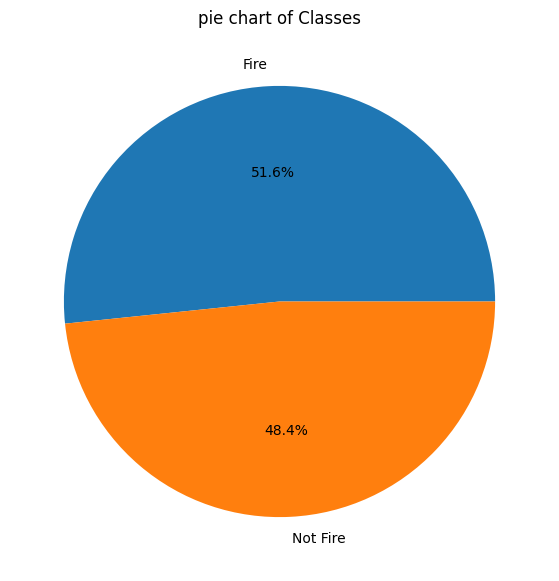

In [12]:
# plotting pie chart
classlabels = ['Fire','Not Fire']
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title('pie chart of Classes')
plt.show()

Correlation

In [13]:
df.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
day,1.000000e+00,5.358691e-17,NaN,0.181092,-0.210608,0.063970,-0.097489,0.291751,0.542760,0.568644,0.371489,0.557301,0.467585,0.306384
month,5.358691e-17,1.000000e+00,NaN,-0.035708,-0.088025,-0.007804,0.145180,-0.040746,-0.007624,-0.006211,-0.011281,-0.009113,0.003330,-0.066455
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,1.810918e-01,-3.570824e-02,NaN,1.000000,-0.660151,-0.228035,-0.486947,0.748423,0.541489,0.532838,0.663871,0.542210,0.608367,0.497810
RH,-2.106080e-01,-8.802546e-02,NaN,-0.660151,1.000000,0.245774,0.329163,-0.653153,-0.347080,-0.314271,-0.586410,-0.338233,-0.476067,-0.377328
Ws,6.396952e-02,-7.803641e-03,NaN,-0.228035,0.245774,1.000000,0.349321,-0.211069,0.039394,0.099231,-0.039266,0.062212,0.029637,-0.121408
Rain,-9.748921e-02,1.451800e-01,NaN,-0.486947,0.329163,0.349321,1.000000,-0.573476,-0.265371,-0.283652,-0.366425,-0.271951,-0.292914,-0.334392
FFMC,2.917513e-01,-4.074604e-02,NaN,0.748423,-0.653153,-0.211069,-0.573476,1.000000,0.608512,0.575221,0.790086,0.600707,0.675553,0.743637
DMC,5.427601e-01,-7.624391e-03,NaN,0.541489,-0.347080,0.039394,-0.265371,0.608512,1.000000,0.962193,0.750098,0.995551,0.901759,0.616951
DC,5.686443e-01,-6.211283e-03,NaN,0.532838,-0.314271,0.099231,-0.283652,0.575221,0.962193,1.000000,0.717591,0.982554,0.869911,0.588464


<Axes: >

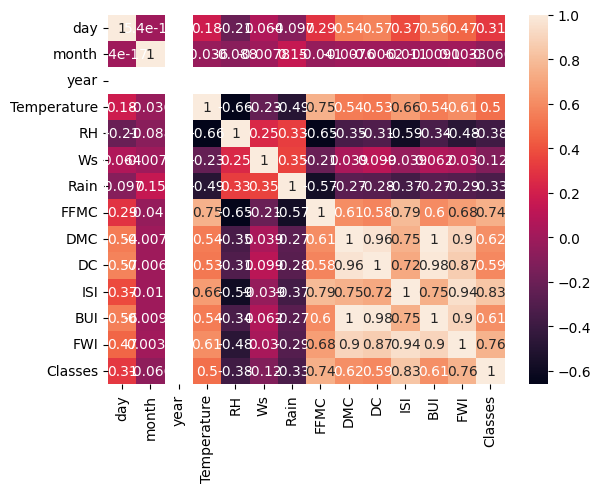

In [14]:
sns.heatmap(df.corr(),annot=True)

<Axes: ylabel='FWI'>

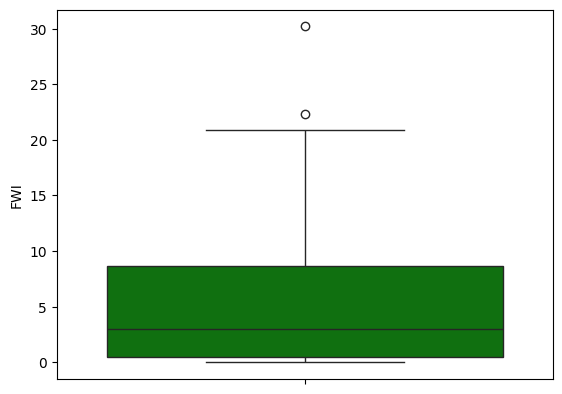

In [15]:
sns.boxplot(df['FWI'],color='green')

Text(0.5, 1.0, 'Fire analysis of Bejaio Region')

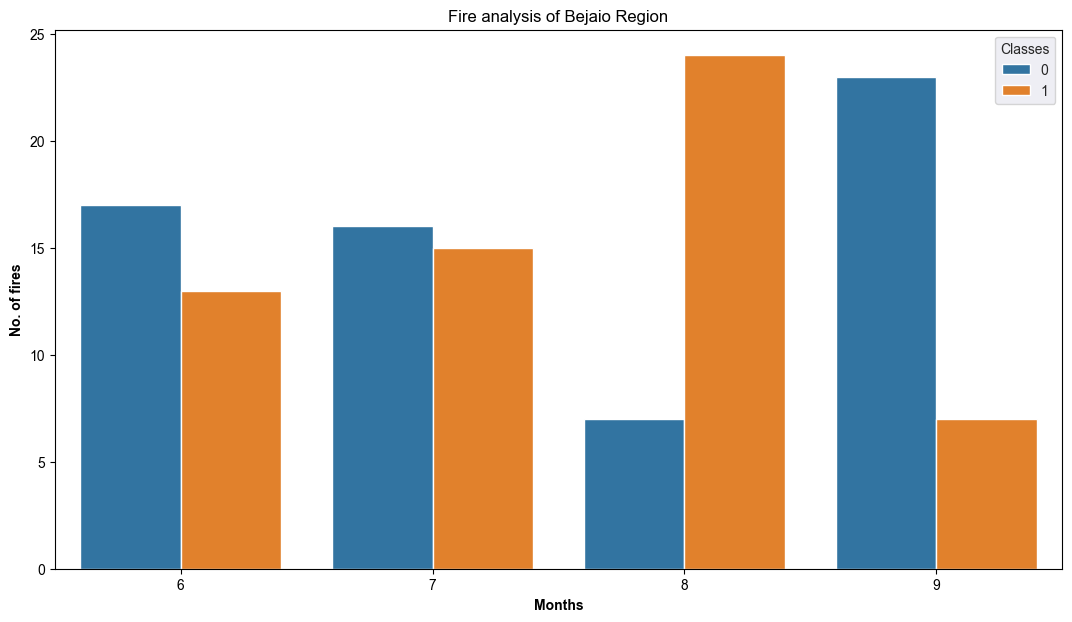

In [16]:
# Monthly Fire Analysis
plt.subplots(figsize=(13,7))
sns.set_style('darkgrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.xlabel('Months',weight='bold')
plt.ylabel('No. of fires',weight='bold')
plt.title('Fire analysis of Bejaio Region')

Its observed that August month had the most no. of fires in this region.

Most of the fires happened in Aug and mostly fire happend in only 3 months - June,July and Aug.

Less Fires was on Sept.

In [17]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [18]:
# Dropping Day, month, year because we dont need! 
df.drop(['day','month','year'],axis=1,inplace=True)

In [19]:
df.head(1)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0


In [20]:
# Independent and Dependent Features
X = df.drop('FWI',axis=1)
y = df['FWI']

In [21]:
X.head(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0


In [22]:
y.head(1)

0    0.5
Name: FWI, dtype: float64

In [23]:
# splitting into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [24]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((91, 10), (31, 10), (91,), (31,))

In [25]:
# Feature Selection based on Correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes
Temperature,1.000000,-0.680264,-0.135288,-0.436188,0.750207,0.545003,0.533488,0.702282,0.544498,0.540134
RH,-0.680264,1.000000,0.229070,0.320706,-0.666734,-0.324957,-0.306356,-0.580488,-0.318486,-0.378169
Ws,-0.135288,0.229070,1.000000,0.364243,-0.139364,0.081886,0.143241,0.029944,0.106211,-0.064097
Rain,-0.436188,0.320706,0.364243,1.000000,-0.527692,-0.261946,-0.299346,-0.377590,-0.274212,-0.360694
FFMC,0.750207,-0.666734,-0.139364,-0.527692,1.000000,0.623398,0.606266,0.811590,0.618525,0.775019
DMC,0.545003,-0.324957,0.081886,-0.261946,0.623398,1.000000,0.973720,0.733634,0.996387,0.622460
DC,0.533488,-0.306356,0.143241,-0.299346,0.606266,0.973720,1.000000,0.730361,0.988647,0.610661
ISI,0.702282,-0.580488,0.029944,-0.377590,0.811590,0.733634,0.730361,1.000000,0.736173,0.841128
BUI,0.544498,-0.318486,0.106211,-0.274212,0.618525,0.996387,0.988647,0.736173,1.000000,0.620282
Classes,0.540134,-0.378169,-0.064097,-0.360694,0.775019,0.622460,0.610661,0.841128,0.620282,1.000000


<Axes: >

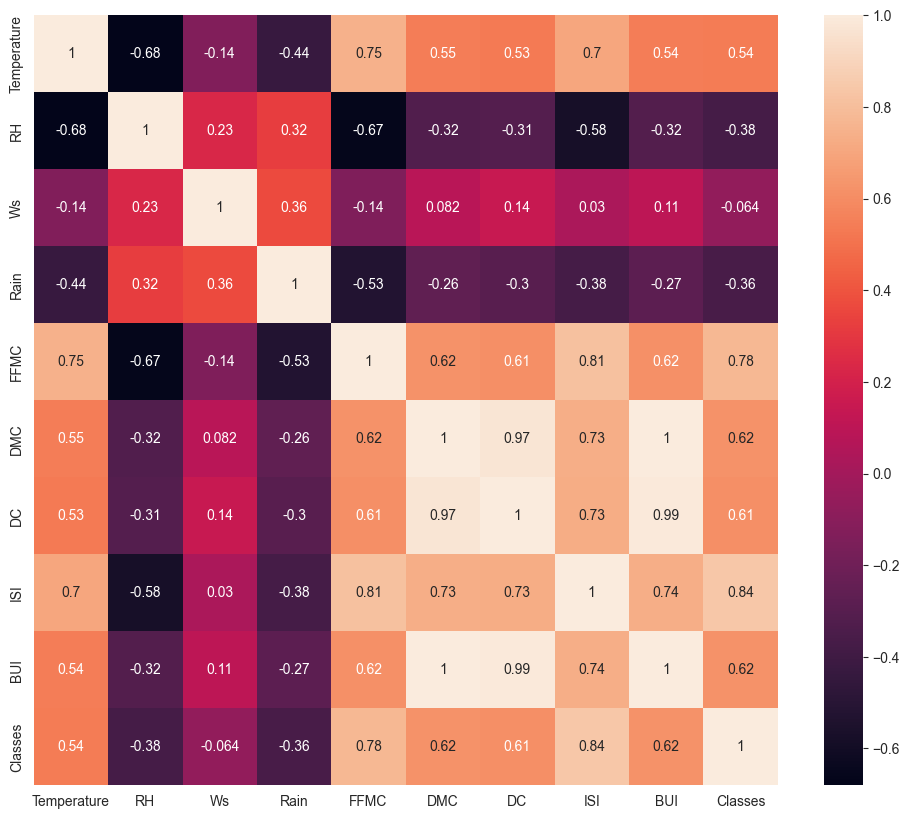

In [26]:
# check for multicolinearity
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr,annot=True)

In [30]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

How I am handling the negative values in corrlation matrix ?
abs - absolute
If I am trying to find out the absolute correlation and absolute make any neg percentage into positive perc also

Whichever column with respect to the other column has greater than the threshold.
The Threshold is decided by a domain Expert. for my case I have given (0.85)

In [ ]:
# threshold -- Domain expertise
corr_features = correlation(X_train,0.85)
corr_features
# BUI and DC has greater than threshold

{'BUI', 'DC'}

In [33]:
# drop features when correlation is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((91, 8), (31, 8))

Feature Scaling or Standardization

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Box plot to understand the effect of Standard Scaler

Text(0.5, 1.0, 'X_train after scaling')

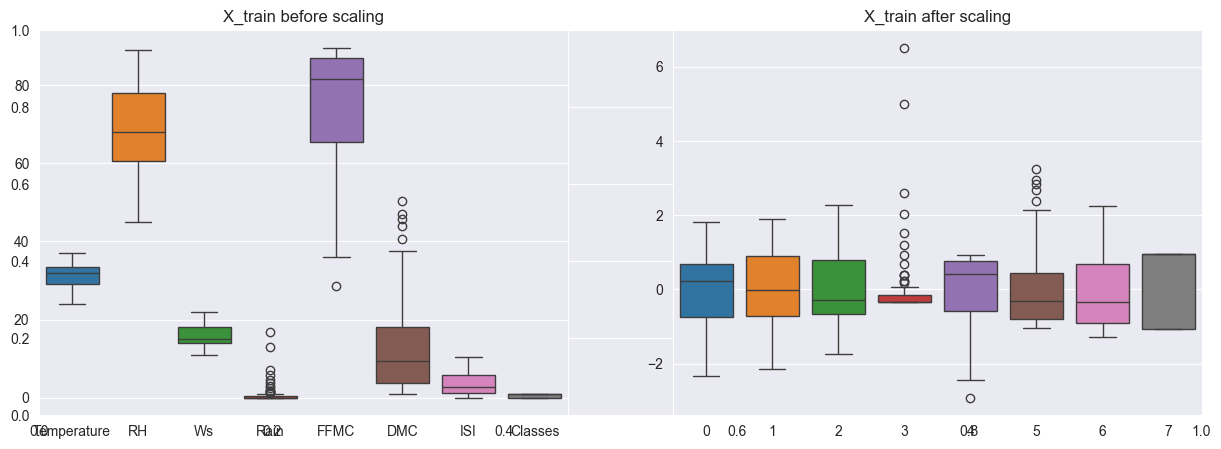

In [37]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train after scaling')

The range in scaled data is between -2 to 4, there are outliers but its okay.

The range was in before scalinng between 0 to 100.

## Linear Regression Model

mean absolute error: 0.4602284749198749
mean squared error: 0.3658728959838119
r2_score: 0.9912862880727432


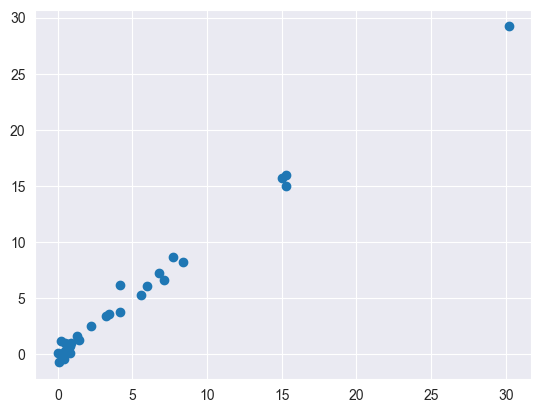

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
linreg = LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred = linreg.predict(X_test_scaled)
mae= mean_absolute_error(y_test,y_pred)
mse= mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('mean absolute error:', mae)
print('mean squared error:', mse)
print('r2_score:', score)
plt.scatter(y_test,y_pred)

R2score is 99, and its in linear relation between y_test and y_pred.
This is go good.

mean absolute error: 1.1834975881342829
mean squared error: 2.7644526181001674
r2_score: 0.9341611690423185


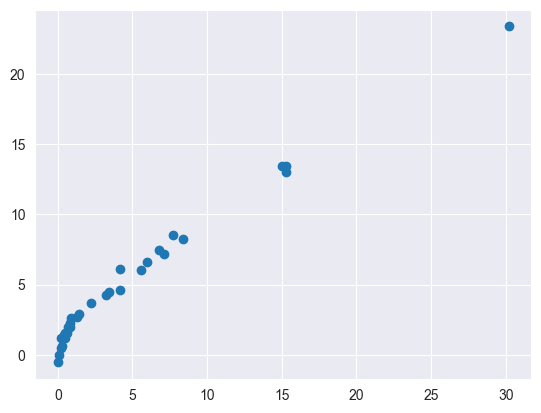

In [39]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
mae= mean_absolute_error(y_test,y_pred)
mse= mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('mean absolute error:', mae)
print('mean squared error:', mse)
print('r2_score:', score)
plt.scatter(y_test,y_pred)

R2 Score is reducing to 93.
As we know why we use Lasso because of Feature Selection.
this is also good

## Cross Validation Lasso

In [40]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

mean absolute error: 0.42739527509314107
mean squared error: 0.33776206482631305
r2_score: 0.9919557820074704


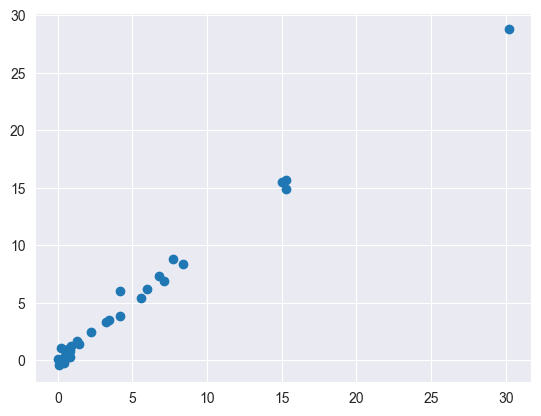

In [41]:
y_pred = lassocv.predict(X_test_scaled)
mae= mean_absolute_error(y_test,y_pred)
mse= mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('mean absolute error:', mae)
print('mean squared error:', mse)
print('r2_score:', score)
plt.scatter(y_test,y_pred)

## Ridge Regression

mean absolute error: 0.4468807122475151
mean squared error: 0.3811985465259835
r2_score: 0.9909212889012052


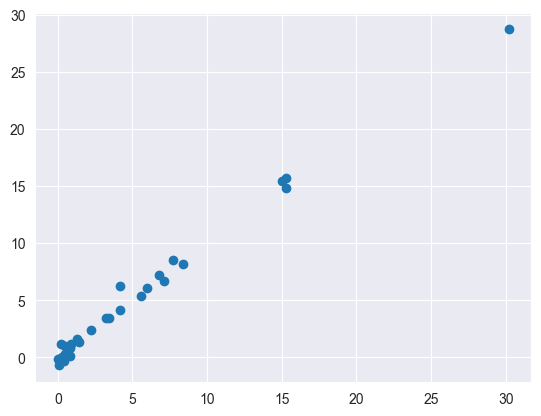

In [42]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mae= mean_absolute_error(y_test,y_pred)
mse= mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('mean absolute error:', mae)
print('mean squared error:', mse)
print('r2_score:', score)
plt.scatter(y_test,y_pred)

Concept of Cross Validation

We basically divide our train dataset into training and Validation dataset. 
So we can perform hyperparameter tuning on this RidgeCv.
We will get 5 different accuracy and merge all the accuracies.
We will basically find out the average.


mean absolute error: 0.4575183139360985
mean squared error: 0.36524511569501317
r2_score: 0.9913012394305789


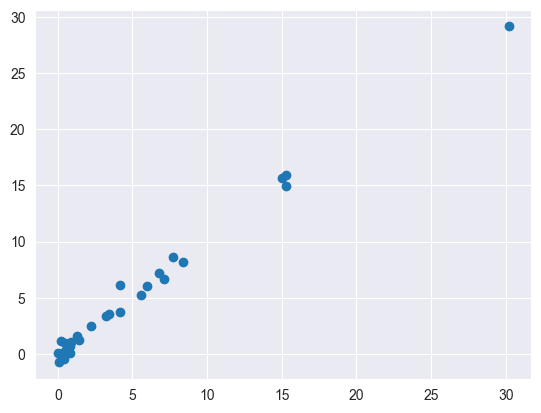

In [43]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred = ridgecv.predict(X_test_scaled)
mae= mean_absolute_error(y_test,y_pred)
mse= mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('mean absolute error:', mae)
print('mean squared error:', mse)
print('r2_score:', score)
plt.scatter(y_test,y_pred)

In [45]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

ElasticNet Regression

mean absolute error: 1.64460863806815
mean squared error: 5.80913663210738
r2_score: 0.8616482835599338


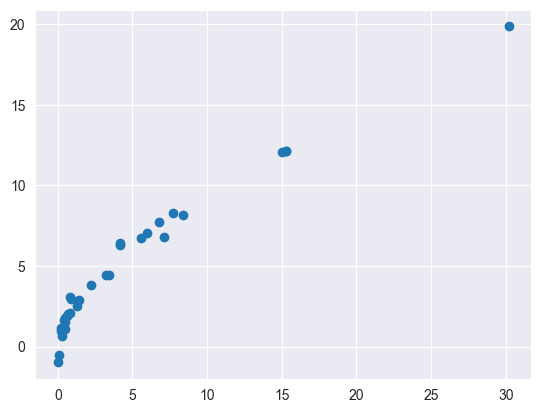

In [46]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
elastic = ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred = elastic.predict(X_test_scaled)
mae= mean_absolute_error(y_test,y_pred)
mse= mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('mean absolute error:', mae)
print('mean squared error:', mse)
print('r2_score:', score)
plt.scatter(y_test,y_pred)

mean absolute error: 0.4458033776182951
mean squared error: 0.36325899801504336
r2_score: 0.9913485412600034


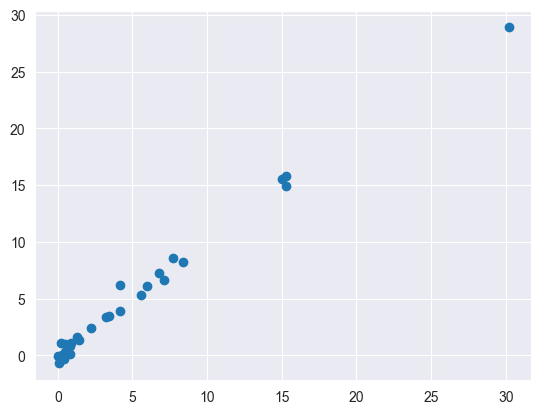

In [47]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
elasticcv = ElasticNetCV()
elasticcv.fit(X_train_scaled,y_train)
y_pred = elasticcv.predict(X_test_scaled)
mae= mean_absolute_error(y_test,y_pred)
mse= mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('mean absolute error:', mae)
print('mean squared error:', mse)
print('r2_score:', score)
plt.scatter(y_test,y_pred)

Pickle the machine learning model, processing model standardscaler

In [48]:
scaler

StandardScaler()

In [49]:
ridge

Ridge()

In [50]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))
